In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from RAVEN.pe.mac_taylor_utils import *
import matplotlib.pyplot as plt

# test MAC_Taylor

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

a = torch.arange(0, 1, 0.001).to(device)

precise = torch.exp(a).to(device)

point = 0.5
scale = torch.exp(torch.tensor([point])).to(device)
var = a - point

coeff = [1/1, 1/1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040, 1/40320, 1/362880]

coeff = coeff[0:8]
print(coeff)

approximate = MAC_Taylor(scale, 
                         coeff, 
                         var, 
                         fxp=True, 
                         intwidth=7, 
                         fracwidth=8, 
                         rounding_coeff="round", 
                         rounding_var="floor", 
                         keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984]
min error rate: tensor(-0.0118)
max error rate: tensor(-0.0001)
avg error rate: tensor(-0.0053)
rms error rate: tensor(0.0056)


# point search test

In [17]:
intwidth = 7
fracwidth = 16

## test exp

### fxp

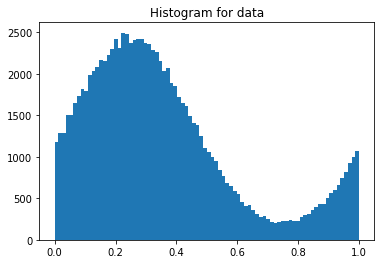

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642354667', '-0.0802985579', '-0.0189881250', '-0.0036642477', '-0.0006052495', '-0.0000942429', '-0.0000213670', '-0.0000119848']
max error: ['0.0000000000', '0.0000075998', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000078691', '0.0000139244']
avg error: ['-0.0614627562', '-0.0119620720', '-0.0020943414', '-0.0003283649', '-0.0000460548', '-0.0000057619', '-0.0000006343', '0.0000001106']
rms error: ['0.0919435099', '0.0231064521', '0.0048919427', '0.0008719586', '0.0001333241', '0.0000180483', '0.0000040869', '0.0000035947']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.1733532250', '-0.0405034609', '-0.0072913

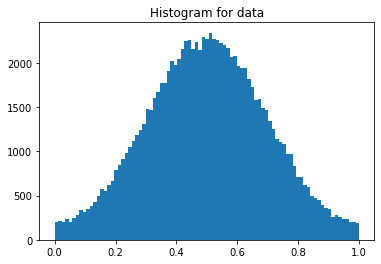

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189862568', '-0.0036587454', '-0.0005996561', '-0.0000888070', '-0.0000191222', '-0.0000111836']
max error: ['0.0000000000', '0.0000074807', '0.0000074807', '0.0000074807', '0.0000075521', '0.0000075521', '0.0000084938', '0.0000139244']
avg error: ['-0.0961612463', '-0.0185560789', '-0.0029454739', '-0.0004006936', '-0.0000481404', '-0.0000051528', '-0.0000004976', '0.0000000764']
rms error: ['0.1117351353', '0.0245296061', '0.0044860691', '0.0007051506', '0.0000975246', '0.0000123697', '0.0000034905', '0.0000032547']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.1733602285', '-0.0405023992', '-0.007293554

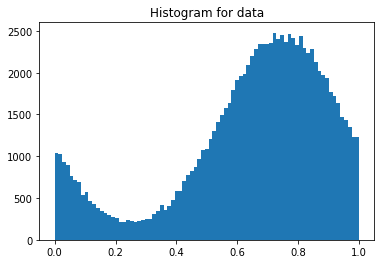

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189863350', '-0.0036642477', '-0.0006052495', '-0.0000943206', '-0.0000213670', '-0.0000119848']
max error: ['0.0000000000', '0.0000075995', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000084938', '0.0000138059']
avg error: ['-0.1449017674', '-0.0343546271', '-0.0065029813', '-0.0010267081', '-0.0001397394', '-0.0000166627', '-0.0000017368', '0.0000003647']
rms error: ['0.1614964306', '0.0407170504', '0.0082410956', '0.0013939037', '0.0002030917', '0.0000260866', '0.0000044007', '0.0000034175']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.1733602285', '-0.0405034609', '-0.0072935

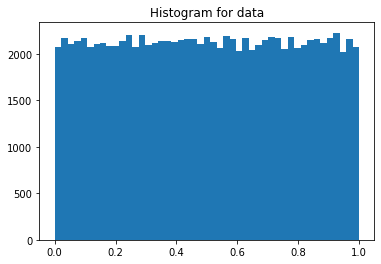

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642298639', '-0.0802957490', '-0.0189824942', '-0.0036635383', '-0.0006052495', '-0.0000943206', '-0.0000213670', '-0.0000119848']
max error: ['0.0000000000', '0.0000075995', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000076965', '0.0000084938', '0.0000152157']
avg error: ['-0.1036846265', '-0.0233429428', '-0.0043486464', '-0.0006884449', '-0.0000948661', '-0.0000115241', '-0.0000012344', '0.0000002403']
rms error: ['0.1320590675', '0.0334078185', '0.0068723913', '0.0011844944', '0.0001756984', '0.0000230100', '0.0000043019', '0.0000035319']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889']
min error: ['-0.1733462214', '-0.0405011810', '-0.007291320

In [18]:
point_search(func="exp", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp

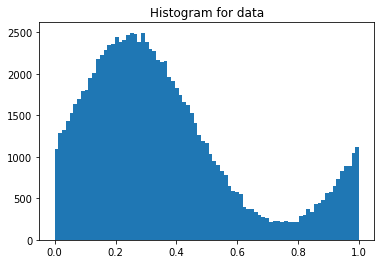

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010525']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000723']
avg error: ['-0.0625504106', '-0.0122948634', '-0.0021724068', '-0.0003434667', '-0.0000484298', '-0.0000061195', '-0.0000007206', '-0.0000001052']
rms error: ['0.0934934393', '0.0236647148', '0.0050411532', '0.0009044632', '0.0001389069', '0.0000185867', '0.0000021942', '0.0000002356']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

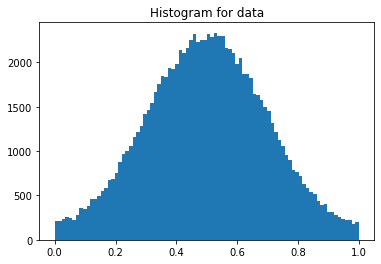

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010525']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000723']
avg error: ['-0.0960355252', '-0.0185518228', '-0.0029496611', '-0.0004022757', '-0.0000483310', '-0.0000052294', '-0.0000005352', '-0.0000000770']
rms error: ['0.1117721125', '0.0245815162', '0.0045082080', '0.0007116495', '0.0000986382', '0.0000121814', '0.0000013563', '0.0000001590']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

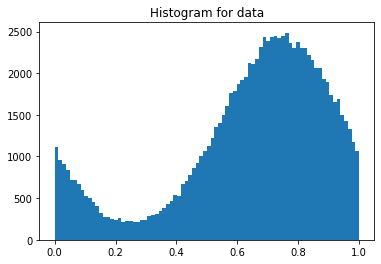

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010525']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000723']
avg error: ['-0.1449500471', '-0.0343813673', '-0.0065145572', '-0.0010304361', '-0.0001402143', '-0.0000167892', '-0.0000018064', '-0.0000001931']
rms error: ['0.1615926772', '0.0407911204', '0.0082740076', '0.0014043633', '0.0002050083', '0.0000262661', '0.0000029953', '0.0000003123']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

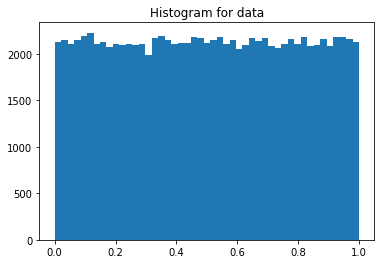

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010525']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000723']
avg error: ['-0.1038485616', '-0.0234334338', '-0.0043783127', '-0.0006958758', '-0.0000960881', '-0.0000117384', '-0.0000013016', '-0.0000001529']
rms error: ['0.1324178427', '0.0336055160', '0.0069442759', '0.0012041618', '0.0001794432', '0.0000234198', '0.0000027118', '0.0000002853']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

In [3]:
point_search(func="exp", fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test div

### fxp

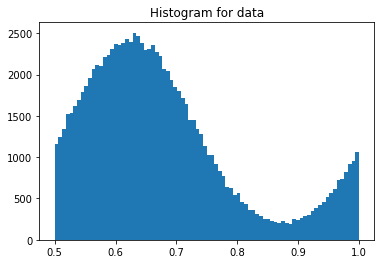

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-0.9999389648', '-0.0000038221', '-0.9998779297', '-0.0000039488', '-0.9998168945', '-0.0000041695', '-0.0000042879']
max error: ['0.0000000000', '0.9999084473', '0.0000038395', '0.9998474121', '0.0000040838', '0.9997863770', '0.0245515145']
avg error: ['-0.1859178841', '0.1241508499', '-0.0958199799', '0.0803740099', '-0.0706893504', '0.0639202893', '0.0025627005']
rms error: ['0.3095479906', '0.2658746541', '0.2424767613', '0.2264144868', '0.2139226645', '0.2035859972', '0.0064292420']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599646091', '-0.0080032349', '-0.1295756549', '-0.0003208198', '-0.0466454066', '-0.0000164088', 

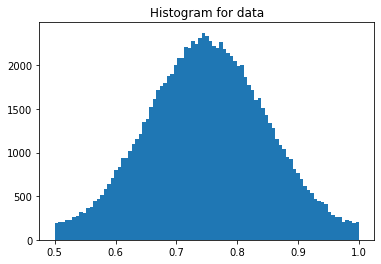

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-0.9998779297', '-0.0000037026', '-0.9997558594', '-0.0000039488', '-0.9996337891', '-0.0000041695', '-0.0000042879']
max error: ['0.0000000000', '0.9998168945', '0.0000038138', '0.9996948242', '0.0000040838', '0.9995727539', '0.0245515220']
avg error: ['-0.2882348895', '0.1824072748', '-0.1238441989', '0.0889052525', '-0.0667808205', '0.0520678200', '0.0050974987']
rms error: ['0.3519150317', '0.2584198117', '0.2046286613', '0.1707189828', '0.1477950960', '0.1314157844', '0.0084001832']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599438369', '-0.0079960935', '-0.1295584291', '-0.0003206614', '-0.0466294363', '-0.0000162885', '-

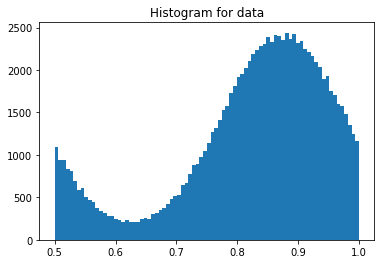

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0000038221', '-1.0000000000', '-0.0000039488', '-1.0000000000', '-0.0000041695', '-0.0000042879']
max error: ['0.0000000000', '1.0000000000', '0.0000038395', '1.0000000000', '0.0000040838', '1.0000000000', '0.0245539937']
avg error: ['-0.4776198566', '0.3718795478', '-0.2995017171', '0.2476154268', '-0.2091130018', '0.1797283143', '0.0114813745']
rms error: ['0.5472674966', '0.4572887123', '0.3959364891', '0.3515586257', '0.3179878592', '0.2916838825', '0.0143950619']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3600006104', '-0.0079960935', '-0.1296081543', '-0.0003208198', '-0.0466613770', '-0.0000164088', 

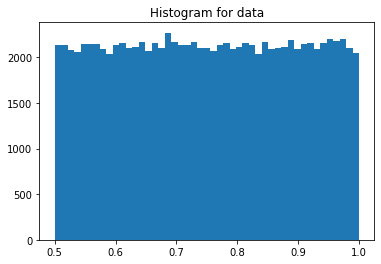

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000']
min error: ['-1.0000000000', '-0.0000038221', '-1.0000000000', '-0.0000039488', '-1.0000000000', '-0.0000041695', '-0.0000042879']
max error: ['0.0000000000', '1.0000000000', '0.0000038395', '1.0000000000', '0.0000040838', '1.0000000000', '0.0245515220']
avg error: ['-0.3339511752', '0.2505341470', '-0.2004682720', '0.1670724303', '-0.1431991905', '0.1252774596', '0.0069763544']
rms error: ['0.4477367997', '0.3784166574', '0.3336537480', '0.3016678393', '0.2773335278', '0.2580135167', '0.0111121377']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3600006104', '-0.0080032349', '-0.1296081543', '-0.0003208198', '-0.0466613770', '-0.0000164088', '-0.

In [19]:
point_search(func="div", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp

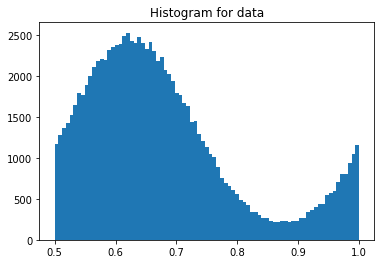

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000']
max error: ['0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000']
avg error: ['-0.1908315569', '0.1297492534', '-0.1019947827', '0.0871812254', '-0.0782025829', '0.0721987709', '-0.0678794980', '0.0646033883']
rms error: ['0.3193662167', '0.2796472311', '0.2605369389', '0.2490452230', '0.2412836850', '0.2357312590', '0.2316414863', '0.2285815179']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599999547', '-0.0

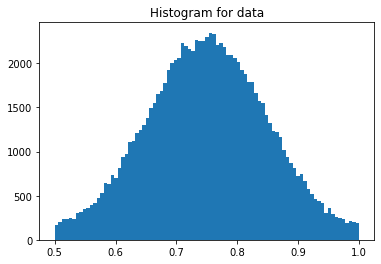

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000']
max error: ['0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000']
avg error: ['-0.2888890505', '0.1839384735', '-0.1258658022', '0.0912143141', '-0.0692806393', '0.0547162592', '-0.0446542874', '0.0374674983']
rms error: ['0.3547756970', '0.2632121146', '0.2113155425', '0.1794092208', '0.1586255133', '0.1445008516', '0.1345951706', '0.1274835914']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599999547', '-0.007

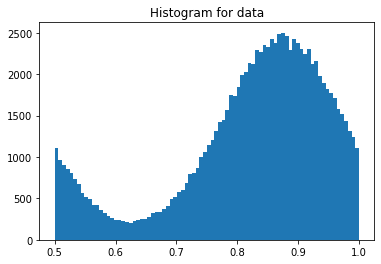

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000']
max error: ['0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000']
avg error: ['-0.4784718752', '0.3745547235', '-0.3039900064', '0.2538237572', '-0.2169474214', '0.1891123205', '-0.1676394939', '0.1507702917']
rms error: ['0.5513528585', '0.4657761455', '0.4094379544', '0.3705575168', '0.3428515494', '0.3226636350', '0.3077233434', '0.2965454459']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599999547', '-0.0

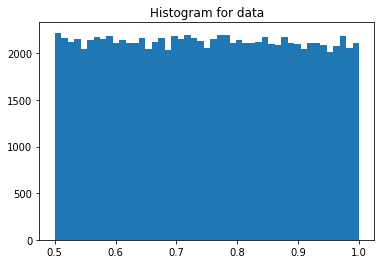

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['2.0000000000', '4.0000000000', '8.0000000000', '16.0000000000', '32.0000000000', '64.0000000000', '128.0000000000', '256.0000000000']
min error: ['-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000', '-1.0000000000', '0.0000000000']
max error: ['0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000']
avg error: ['-0.3336757720', '0.2517381310', '-0.2031866759', '0.1713133603', '-0.1489510536', '0.1325176507', '-0.1200245097', '0.1102791354']
rms error: ['0.4507623315', '0.3859417439', '0.3464454710', '0.3201929629', '0.3018551469', '0.2886478305', '0.2789462507', '0.2717255950']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['1.6000000000', '2.5600000000', '4.0960000000', '6.5536000000', '10.4857600000', '16.7772160000', '26.8435456000', '42.9496729600']
min error: ['-0.3599999547', '-0.00799

In [4]:
point_search(func="div", fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test log

### fxp

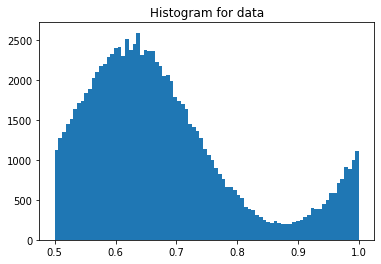

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-20108.8457031250', '-0.0000109764', '-9185.9296875000', '-0.0000118989', '-5908.9550781250', '-0.0000140775', '-4348.9667968750', '-0.0000170198']
max error: ['-0.0000020638', '12656.9033203125', '0.0000113167', '7195.9453125000', '0.0000128641', '5010.9619140625', '0.0000158613', '3840.9707031250']
avg error: ['-4.8366174698', '2.9707961082', '-2.1201734543', '1.6391059160', '-1.3311290741', '1.1176750660', '-0.9612785578', '0.8418974876']
rms error: ['134.4904785156', '84.6407012939', '61.4218559265', '48.1100616455', '39.5019187927', '33.4942054749', '29.0659561157', '25.6679248810']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.796

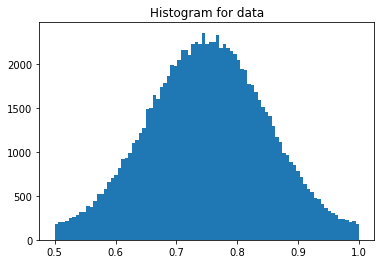

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-10053.8466796875', '-0.0000107640', '-4592.4296875000', '-0.0000118989', '-2953.9548339844', '-0.0000140775', '-2173.9667968750', '-0.0000170198']
max error: ['-0.0000020640', '6327.9033203125', '0.0000112604', '3597.4450683594', '0.0000128641', '2504.9616699219', '0.0000158613', '1919.9707031250']
avg error: ['-1.2780709267', '0.6903210878', '-0.4474537373', '0.3218428195', '-0.2474083602', '0.1990739405', '-0.1655344069', '0.1410790980']
rms error: ['37.8898506165', '23.8400497437', '17.2968063354', '13.5457849503', '11.1201696396', '9.4277954102', '8.1802158356', '7.2229528427']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.796202666

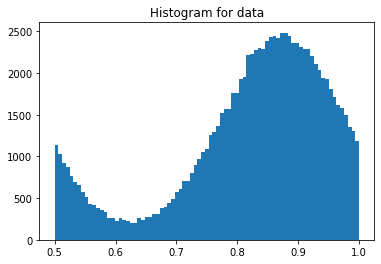

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-20108.8457031250', '-0.0000109764', '-9185.9296875000', '-0.0000118989', '-5908.9550781250', '-0.0000137956', '-4348.9667968750', '-0.0000168632']
max error: ['-0.0000020638', '12656.9033203125', '0.0000113167', '7195.9453125000', '0.0000128641', '5010.9619140625', '0.0000157352', '3840.9707031250']
avg error: ['-7.1612987518', '4.3243222237', '-3.0328848362', '2.3086953163', '-1.8502829075', '1.5363324881', '-1.3089710474', '1.1373025179']
rms error: ['177.0000152588', '111.3968124390', '80.8405838013', '63.3222694397', '51.9939422607', '44.0878601074', '38.2603950500', '33.7886466980']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.79

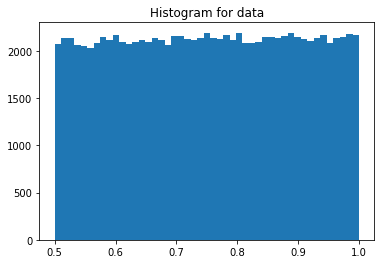

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-20108.8457031250', '-0.0000109764', '-9185.9296875000', '-0.0000118989', '-5908.9550781250', '-0.0000140421', '-4348.9667968750', '-0.0000170198']
max error: ['-0.0000020638', '12656.9033203125', '0.0000113167', '7195.9453125000', '0.0000128641', '5010.9619140625', '0.0000158613', '3840.9707031250']
avg error: ['-6.0949025154', '3.7066705227', '-2.6184632778', '2.0059609413', '-1.6163761616', '1.3481838703', '-1.1529728174', '1.0048874617']
rms error: ['136.3316192627', '85.7968673706', '62.2591896057', '48.7647171021', '40.0388717651', '33.9484977722', '29.4595603943', '26.0150032043']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.79620

In [20]:
point_search(func="log", fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp

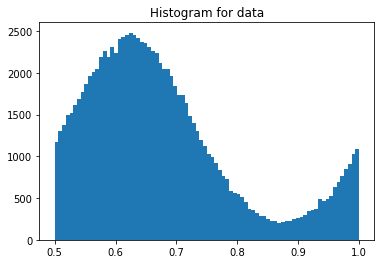

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-3.8177406788', '-0.0000000000', '-1.3462678194', '-0.0000000000', '-0.6650684476', '-0.0000000000', '-0.3753220141', '-0.0000000000']
max error: ['-0.0000000000', '2.1137943268', '-0.0000000000', '0.9243976474', '-0.0000000000', '0.4939172566', '-0.0000000000', '0.2901893258']
avg error: ['-0.4166761935', '0.2045105100', '-0.1215841770', '0.0799685717', '-0.0558861494', '0.0406466089', '-0.0304056201', '0.0232233685']
rms error: ['1.0897150040', '0.5953116417', '0.3762043715', '0.2570123971', '0.1842714697', '0.1365171373', '0.1035569683', '0.0799667388']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428

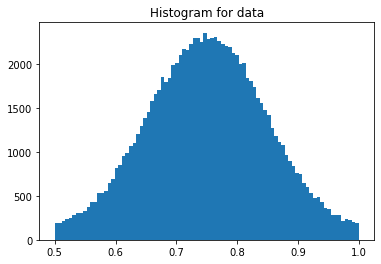

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-3.8177406788', '-0.0000000000', '-1.3462678194', '-0.0000000000', '-0.6650684476', '-0.0000000000', '-0.3753220141', '-0.0000000000']
max error: ['-0.0000000000', '2.1137943268', '-0.0000000000', '0.9243976474', '-0.0000000000', '0.4939172566', '-0.0000000000', '0.2901893258']
avg error: ['-0.4503773451', '0.1917191297', '-0.0992542729', '0.0578306913', '-0.0364902951', '0.0243803561', '-0.0170010868', '0.0122521287']
rms error: ['0.8271632195', '0.4246783257', '0.2575630248', '0.1711492240', '0.1203880012', '0.0880016834', '0.0661212578', '0.0507100672']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428,

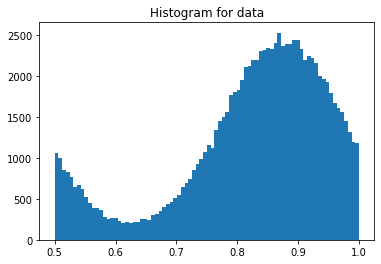

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-3.8177406788', '-0.0000000000', '-1.3462678194', '-0.0000000000', '-0.6650684476', '-0.0000000000', '-0.3753220141', '-0.0000000000']
max error: ['-0.0000000000', '2.1137943268', '-0.0000000000', '0.9243976474', '-0.0000000000', '0.4939172566', '-0.0000000000', '0.2901893258']
avg error: ['-1.1752156019', '0.5843920708', '-0.3409488201', '0.2178811878', '-0.1477455646', '0.1044672802', '-0.0761994421', '0.0569292754']
rms error: ['1.7198495865', '0.9218254089', '0.5739108920', '0.3877756000', '0.2757934034', '0.2031237036', '0.1534224600', '0.1181015074']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428

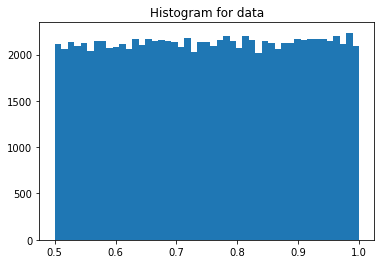

[0.6931471805599453, 2.0, 2.0, 2.6666666666666665, 4.0, 6.4, 10.666666666666666, 18.285714285714285, 32.0, 1.0]
gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-3.8177406788', '-0.0000000000', '-1.3462678194', '-0.0000000000', '-0.6650684476', '-0.0000000000', '-0.3753220141', '-0.0000000000']
max error: ['-0.0000000000', '2.1137943268', '-0.0000000000', '0.9243976474', '-0.0000000000', '0.4939172566', '-0.0000000000', '0.2901893258']
avg error: ['-0.8168777823', '0.4067851901', '-0.2395892888', '0.1549379677', '-0.1063316986', '0.0760313570', '-0.0560199730', '0.0422272980']
rms error: ['1.4761217833', '0.7974590063', '0.4995686114', '0.3391100168', '0.2420049012', '0.1786847264', '0.1352113336', '0.1042233631']

[0.4700036292457356, 1.6, 1.28, 1.3653333333333333, 1.6384, 2.0971520000000003, 2.7962026666666664, 3.834792228571428, 

In [5]:
point_search(func="log", fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)